# Homework 1 (100 points)

The goal of this homework is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops

look through the pandas documentation for alternatives.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [4]:
import pandas as pd

df = pd.read_csv("train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [5]:
def num_nans(df):
    return df.isnull().any(axis=1).sum()
print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [6]:
def drop_na(df):
    return df.dropna(axis = 1, thresh= len(df) - 200)

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [7]:
def to_numerical(df):
    return pd.get_dummies(df[['Sex']], drop_first = True)

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [8]:
def extract_names(df):
    df_name = df['Name'].str.split('[,|.|)|" "|"]', expand = True, n = 6)
    re_name = df_name[[4, 5, 0, 2]] 
    print(type(re_name))
    return re_name

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()
#df[['Title']] = df['Name'].str.extract(r'([A-Za-z]+)\.')
#df.head()

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [9]:
def replace_with_mean(df):
   return df['Age'].fillna(df['Age'].mean())

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

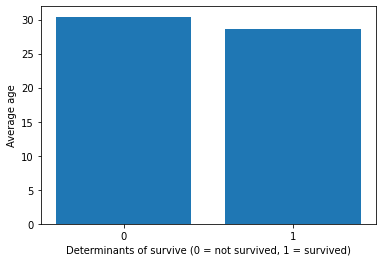

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

mean_age = df.groupby('Survived').Age.mean()
label = mean_age.index
index = np.arange(len(label))

plt.bar(index, mean_age)
plt.xticks(index, label)
plt.xlabel('Determinants of survive (0 = not survived, 1 = survived)')
plt.ylabel('Average age')
plt.show()


-> The average age of those who survived is slightly lower than of those who did not survive. 

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

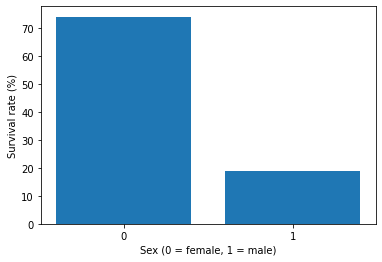

In [11]:
survivors = df.groupby('Sex')['Survived'].mean()
label = survivors.index
index = np.arange(len(label))

plt.bar(index, survivors*100)
plt.xticks(index, label)
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel('Survival rate (%)')
plt.show()


-> Female turns out to be survived more than male.

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

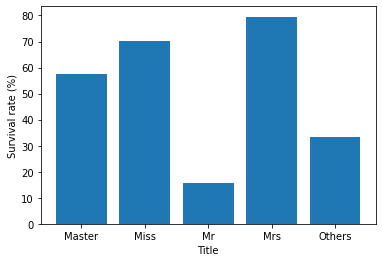

In [12]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Don'], 'Mr')
df['Title'] = df['Title'].replace(['Mme', 'Lady', 'Dona'], 'Mrs')
df['Title'] = df['Title'].replace(['Capt', 'Captain','Col', 'Countess', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Others')

survivors_title = (df.groupby('Title').Survived.mean())*100
label = survivors_title.index
index = np.arange(len(label))

plt.bar(label, survivors_title)
plt.xticks(index, label)
plt.xlabel('Title')
plt.ylabel('Survival rate (%)')
plt.show()



-> The chart shows that the survival rate of adult men with the title "Mr" is significantly lower than that of those with other titles. In addition, data from the titles 'Miss' and 'Mrs', which refer to women, show that women have a higher survival rate than men with titles of 'Master' and 'Mr'.

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

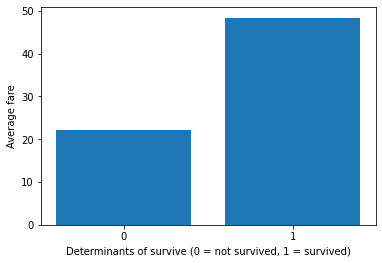

In [13]:
survivors_avgfare = df.groupby('Survived')['Fare'].mean()

label = survivors_avgfare.index
index = np.arange(len(label))

plt.bar(index, survivors_avgfare)
plt.xticks(index, label)
plt.xlabel('Determinants of survive (0 = not survived, 1 = survived)')
plt.ylabel('Average fare')
plt.show()

-> The average fare for those who survived is twice as high as for those who did not survive

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

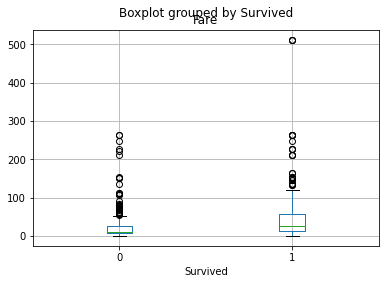

In [14]:
boxplot = df.boxplot(column = ['Fare'], by = "Survived")
boxplot.plot()

plt.show()

->People who paid a higher fare tend to survive more than those who paid a lower fare 

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [15]:
def func_fare(df):
    avgfare = df['Fare'] - df['Fare'].mean()
    divfare_std = avgfare/df['Fare'].std()
    return divfare_std


df['Fare'] = func_fare(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,-0.502163,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,0.786404,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,-0.488580,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,0.420494,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,-0.486064,S,William,Henry,Allen,Mr


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [13]:
df_nonnum = df
df = df.select_dtypes('number')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,-0.502163
1,2,1,1,0,38.0,1,0,0.786404
2,3,1,3,0,26.0,0,0,-0.488580
3,4,1,1,0,35.0,1,0,0.420494
4,5,0,3,1,35.0,0,0,-0.486064


m) Ignoring passenger ID, write a function that returns the names of the N most similar passengers using the euclidean distance? - (15 points)

In [15]:
from sklearn.metrics.pairwise import euclidean_distances
import itertools

def N_most_similar(df, N):
    df_withoutid = df.drop(['PassengerId'], axis = 1) #ignore passengerid
    distance_matrix = np.full((df.shape[0], df.shape[0]), 100.0) #initialize distance matrix 
    
    for i, j in itertools.combinations(df.index, 2):
        distance_matrix[i][j] = euclidean_distances([df_withoutid.loc[i]], [df_withoutid.loc[j]])[0][0]  
    
    pssnger_list = [[0, 0]]
    count = N
    while count > 0 :
        min_index = np.unravel_index(np.argmin(distance_matrix, axis=None), distance_matrix.shape)
        pssngers = [[df_nonnum['Name'][min_index[0]], df_nonnum['Name'][min_index[1]]]]
        pssnger_list = np.concatenate((pssnger_list, pssngers), axis = 0)
        distance_matrix[min_index[0]][min_index[1]]= np.max(distance_matrix)
        count -= 1
    pssnger_list = np.delete(pssnger_list, 0, 0)
    return pssnger_list
    
print("The 3 most similar passengers are: " + str(N_most_similar(df, 3)))

The 3 most similar passengers are: [['Allen, Mr. William Henry' 'Brocklebank, Mr. William Alfred']
 ['Emir, Mr. Farred Chehab' 'Yousif, Mr. Wazli']
 ['Emir, Mr. Farred Chehab' 'Lahoud, Mr. Sarkis']]


## Exercise 2 - (40 points)

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. - (5 points)

In [16]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    return response
    
topics = ["Python", "Data Science", "Data Analysis", "Machine Learning", "Deep Learning"]

python = get(topics[0])
data_science = get(topics[1])
data_analytics = get(topics[2])
machine_learning = get(topics[3])
deep_learning = get(topics[4])

b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. - (5 points)

In [17]:
py_df = pd.json_normalize(python['items'])
py_df.to_csv(r'C:\Users\3eypa\Documents\CS506\homework1-jjoeypark\py_df.csv')
ds_df = pd.json_normalize(data_science['items'])
ds_df.to_csv(r'C:\Users\3eypa\Documents\CS506\homework1-jjoeypark\ds_df.csv')
da_df = pd.json_normalize(data_analytics['items'])
da_df.to_csv(r'C:\Users\3eypa\Documents\CS506\homework1-jjoeypark\da_df.csv')
ml_df = pd.json_normalize(machine_learning['items'])
ml_df.to_csv(r'C:\Users\3eypa\Documents\CS506\homework1-jjoeypark\ml_df.csv')
dl_df = pd.json_normalize(deep_learning['items'])
dl_df.to_csv(r'C:\Users\3eypa\Documents\CS506\homework1-jjoeypark\dl_df.csv')

c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. - (5 points)

In [27]:
py_df.rename(columns = {'volumeInfo.title' : 'Title'}, inplace = True)
py_df.rename(columns = {'volumeInfo.authors' : 'Authors'}, inplace = True)
ds_df.rename(columns = {'volumeInfo.title' : 'Title'}, inplace = True)
ds_df.rename(columns = {'volumeInfo.authors' : 'Authors'}, inplace = True)
da_df.rename(columns = {'volumeInfo.title' : 'Title'}, inplace = True)
da_df.rename(columns = {'volumeInfo.authors' : 'Authors'}, inplace = True)
ml_df.rename(columns = {'volumeInfo.title' : 'Title'}, inplace = True)
ml_df.rename(columns = {'volumeInfo.authors' : 'Authors'}, inplace = True)
dl_df.rename(columns = {'volumeInfo.title' : 'Title'}, inplace = True)
dl_df.rename(columns = {'volumeInfo.authors' : 'Authors'}, inplace = True)

print(topics_df.Authors)

0                               [Charles R. Severance]
1                                        [Al Sweigart]
2                                   [David M. Beazley]
3                                          [Mark Lutz]
4                                      [Brett Slatkin]
5                                        [Al Sweigart]
6                                      [John M. Zelle]
7                                        [TJ O'Connor]
8                                       [Justin Seitz]
9                                       [Guido Rossum]
0                  [Hadley Wickham, Garrett Grolemund]
1                  [John D. Kelleher, Brendan Tierney]
2                                 [Rafael A. Irizarry]
3                                    [Jake VanderPlas]
4                        [Foster Provost, Tom Fawcett]
5                                          [Joel Grus]
6                   [Emily Robinson, Jacqueline Nolis]
7    [Ryan A. Estrellado, Emily A. Freer, Jesse Mos...
8         

d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. - (10 points)

In [26]:
py_df['Topic'] = topics[0]
ds_df['Topic'] = topics[1]
da_df['Topic'] = topics[2]
ml_df['Topic'] = topics[3]
dl_df['Topic'] = topics[4]
df_list = [py_df, ds_df, da_df, ml_df, dl_df]

topics_df = pd.concat(df_list)
topics_df.to_csv(r'C:\Users\3eypa\Documents\CS506\homework1-jjoeypark\df_topics.csv')

e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). - (5 points)

In [20]:
def title_with_data(df):
    dt_title = df[df['Title'].str.contains("Data")]
    return dt_title

title_lists = title_with_data(topics_df)
print(title_lists)

           kind            id         etag  \
0  books#volume  vfi3DQAAQBAJ  ksZdnpXh/FU   
1  books#volume  TFpVDwAAQBAJ  98g8PXfrAA0   
2  books#volume  xb29DwAAQBAJ  6XfNaXeUMRc   
3  books#volume  6omNDQAAQBAJ  BEUygZ/PUVY   
4  books#volume  4ZctAAAAQBAJ  lUBsSm4Ahbk   
5  books#volume  JYodCAAAQBAJ  m5ZPKbAibRk   
6  books#volume  xDszEAAAQBAJ  nIJKuVCUicc   
7  books#volume  UG76DwAAQBAJ  3pBZed+GGk4   
8  books#volume  vcVKAQAAQBAJ  uA2uDBu1qaE   
9  books#volume  8GnLDwAAQBAJ  1SuG1/fFqbg   
0  books#volume  UiM3DwAAQBAJ  6GstFr3ADbw   
1  books#volume  KqSKipJfxMwC  cRdoFhpVa5c   
2  books#volume  Ha0jEAAAQBAJ  8Q84N/PLK9M   
3  books#volume  ZXL6AQAAQBAJ  N9BszCLol08   
4  books#volume  eaz0DwAAQBAJ  JeDYSQ/+mnc   
5  books#volume  6OSvDBE0rCIC  04Wy3cvgtBo   
6  books#volume  UoZfDwAAQBAJ  90/B7ZLsuME   
7  books#volume  fBPEAgAAQBAJ  8O29fe007IM   
8  books#volume  JhL2FiF3hO4C  T6emDSQVPDQ   
9  books#volume  q6bwDwAAQBAJ  iMcdbJsnLPE   
8  books#volume  QC4NEAAAQBAJ  K9i

f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` - (10 points)

In [22]:
def authors_start_E(df):
    authors_list = []
    for i in range(len(topics_df)):
        strname= " ".join(topics_df.Authors.tolist()[i])
        split_name = strname.split()
        find_name = list(map(lambda x: True if ((x.find("E.") == -1) & (x.startswith('E')) == True) else False, split_name))
        if True in find_name:
            authors_list.append(True)
        else:
            authors_list.append(False)
    df.loc[:, 'Starts with E'] = authors_list
    df_authors = df.loc[df['Starts with E'] == True]
    return df_authors

authors_list = authors_start_E(topics_df)
print(authors_list)


           kind            id         etag  \
6  books#volume  xDszEAAAQBAJ  nIJKuVCUicc   
7  books#volume  UG76DwAAQBAJ  3pBZed+GGk4   
6  books#volume  AGQ4DQAAQBAJ  AiYxXTwFevI   
4  books#volume  LrT4DwAAQBAJ  DZ3BpZGj6P8   

                                            selfLink  \
6  https://www.googleapis.com/books/v1/volumes/xD...   
7  https://www.googleapis.com/books/v1/volumes/UG...   
6  https://www.googleapis.com/books/v1/volumes/AG...   
4  https://www.googleapis.com/books/v1/volumes/Lr...   

                               Title volumeInfo.subtitle  \
6     Build a Career in Data Science                 NaN   
7  Data Science in Education Using R                 NaN   
6                   Machine Learning          The New AI   
4      Introduction to Deep Learning                 NaN   

                                             Authors volumeInfo.publishedDate  \
6                 [Emily Robinson, Jacqueline Nolis]               2020-03-06   
7  [Ryan A. Estrellado, E